<a href="https://colab.research.google.com/github/amrahmani/Machine-Learning/blob/main/Ch3_Classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1:** Predicting whether a student will pass (1) or fail (0) based on study hours, previous passes.

**Dataset** = https://github.com/amrahmani/Machine-Learning/blob/main/student_data.csv


**Objective:** Fit **Quadratic Discriminant Analysis (QDA) classifier** to the data to predict the probability of passing for a new student.

   Student ID  Assignments Completed  Attendance Rate  Previous GPA  \
0           1                     11             0.76          3.41   
1           2                      8             0.84          3.24   
2           3                     12             1.00          2.86   
3           4                      9             0.74          3.53   
4           5                     11             0.95          3.43   

   Study Hours  Previous Passes  Pass/Fail  
0            3                1          0  
1           19                5          1  
2           20                4          1  
3            1                2          0  
4           21                5          1  


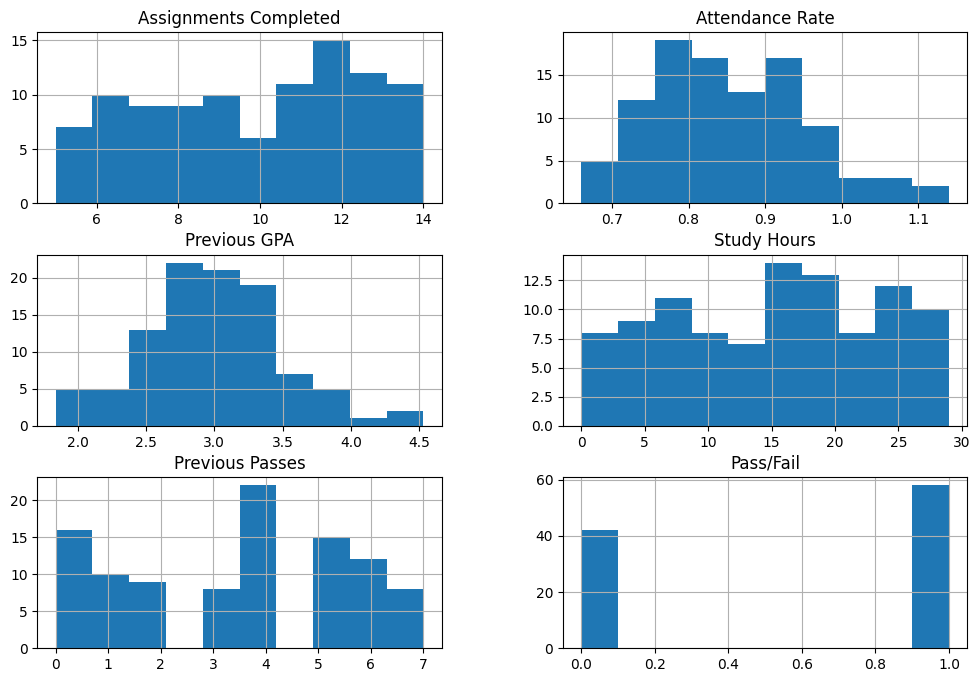

Accuracy: 1.0
Probability of passing: 0.9999999989232056


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


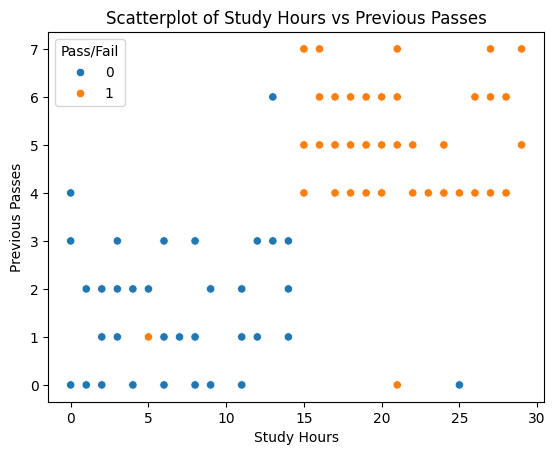

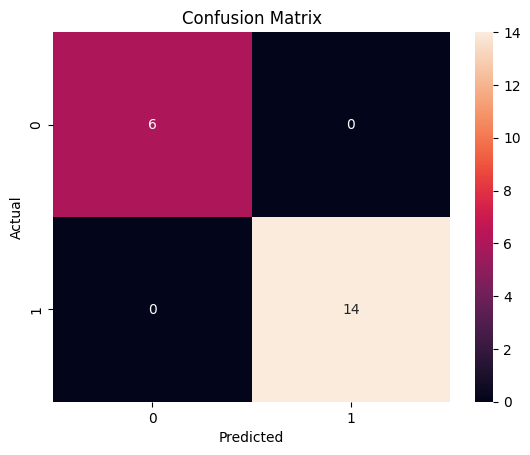

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/Machine-Learning/main/student_data.csv'

# Read the CSV file into a Pandas DataFrame
# A DataFrame in Pandas is a two-dimensional, labeled data structure with columns of potentially different types.
df = pd.read_csv(url)
# Inspect the first few rows of the dataset
print(df.head())

# Display histograms for each feature
df.hist(['Assignments Completed', 'Attendance Rate', 'Previous GPA', 'Study Hours', 'Previous Passes', 'Pass/Fail'], figsize=(12, 8))
plt.show()

# Define features and target
# [['Assignments Completed', 'Attendance Rate', 'Previous GPA', 'Study Hours', 'Previous Passes']]
X = df[['Study Hours', 'Previous Passes']]
y = df['Pass/Fail']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Discriminant Analysis model
clf = QuadraticDiscriminantAnalysis()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict the probability of passing for a new student
new_student = [[60, 3]]  # Replace with actual study hours and previous passes
probability = clf.predict_proba(new_student)[0, 1]
print("Probability of passing:", probability)

# Visualize the data
sns.scatterplot(x='Study Hours', y='Previous Passes', hue='Pass/Fail', data=df)
plt.title('Scatterplot of Study Hours vs Previous Passes')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate a mesh to visualize the decision boundary
h = 0.2
x_min, x_max = X_train.iloc[:, 0].min() - h, X_train.iloc[:, 0].max() + h # Use .iloc to select column by position
y_min, y_max = X_train.iloc[:, 1].min() - h, X_train.iloc[:, 1].max() + h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict labels for each point in the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape Z into a 2D array
Z = Z.reshape(xx.shape) # Reshape Z to match the shape of xx


**Problem 2.1:** Predicting whether a student will pass (1) or fail (0) based on study hours (𝑋_1), and number of previous exam scores (𝑋_2).

**Objective:** Fit **a Decision Tree classifier** to the data to predict the probability of passing for a new student.

**pip install graphviz pydotplus**

In [ ]:
!pip install graphviz pydotplus
# from sklearn.tree import export_graphviz
# from IPython.display import Image
# import pydotplus
# import graphviz

Step 1: Create the dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Ensure reproducibility
np.random.seed(42)
# Create a dataset with 10 students
data = {
    'Study_Hours': [2, 4, 6, 8, 10, 12, 3, 5, 7, 9],
    'Previous_Exam_Score': [60, 65, 70, 80, 85, 90, 50, 75, 55, 95],
    'Pass/Fail': [0, 0, 1, 1, 1, 1, 0, 1, 0, 1]  # 1: Pass, 0: Fail
}

# Convert to DataFrame
df = pd.DataFrame(data)
print("Dataset:\n", df)

# Features: Study_Hours and Previous_Exam_Score
X = df[['Study_Hours', 'Previous_Exam_Score']]

# Labels: Pass/Fail
y = df['Pass/Fail']



Dataset:
    Study_Hours  Previous_Exam_Score  Pass/Fail
0            2                   60          0
1            4                   65          0
2            6                   70          1
3            8                   80          1
4           10                   85          1
5           12                   90          1
6            3                   50          0
7            5                   75          1
8            7                   55          0
9            9                   95          1


Step 2: Fit a decision tree classifier


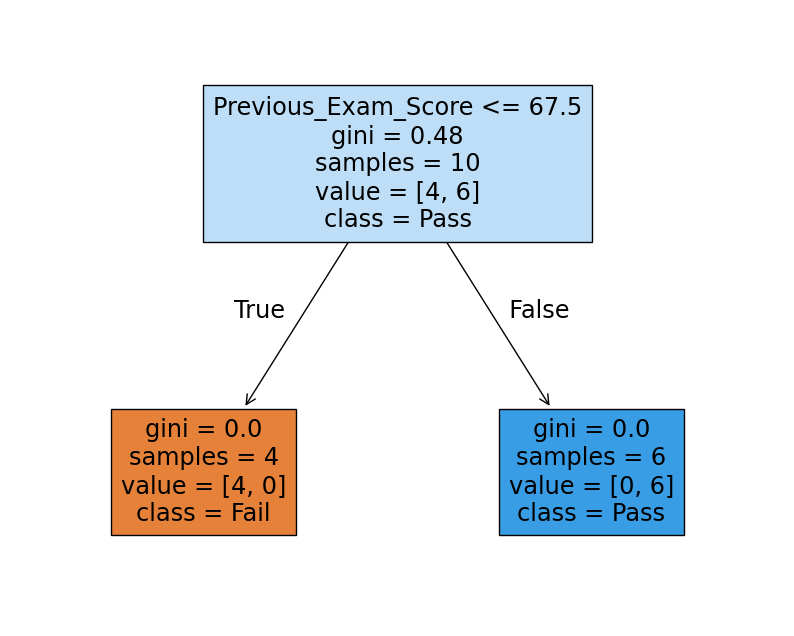

In [5]:
# Initialize the decision tree classifier
# it can be criterion='entropy'
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Fit the model
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, feature_names=['Study_Hours', 'Previous_Exam_Score'], class_names=['Fail', 'Pass'], filled=True)
plt.show()


Step 3: Predict the class for a new student

In [6]:
# Predict the class for a new student with 7 study hours and 65 previous exam score
new_student = np.array([[10, 65]])
prediction = clf.predict(new_student)
predicted_class = "Pass" if prediction == 1 else "Fail"

print(f"The predicted class for the new student is: {predicted_class}")


The predicted class for the new student is: Fail


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Step 4: Calculate and visualize the decision boundary


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


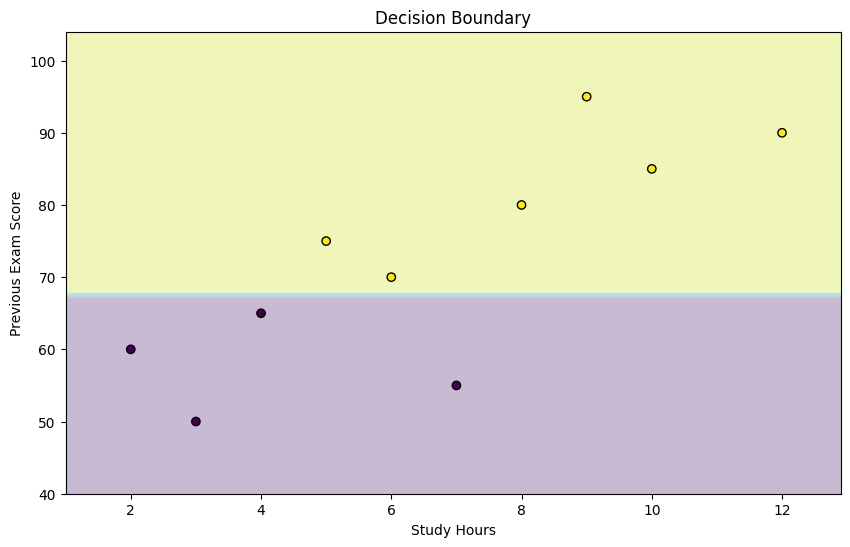

In [7]:
# Define the decision boundary
x_min, x_max = X['Study_Hours'].min() - 1, X['Study_Hours'].max() + 1
y_min, y_max = X['Previous_Exam_Score'].min() - 10, X['Previous_Exam_Score'].max() + 10

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X['Study_Hours'], X['Previous_Exam_Score'], c=y, edgecolors='k', marker='o')
plt.xlabel('Study Hours')
plt.ylabel('Previous Exam Score')
plt.title('Decision Boundary')
plt.show()


Solve the above problem but **force the tree to consider 'Study Hours' first**.

Dataset:
    Study_Hours  Previous_Exam_Score  Pass/Fail
0            2                   60          0
1            4                   65          0
2            6                   70          1
3            8                   80          1
4           10                   85          1
5           12                   90          1
6            3                   50          0
7            5                   75          1
8            7                   55          0
9            9                   95          1
Accuracy: 0.50
|--- Study Hours <= 4.00
|   |--- class: 0
|--- Study Hours >  4.00
|   |--- class: 1



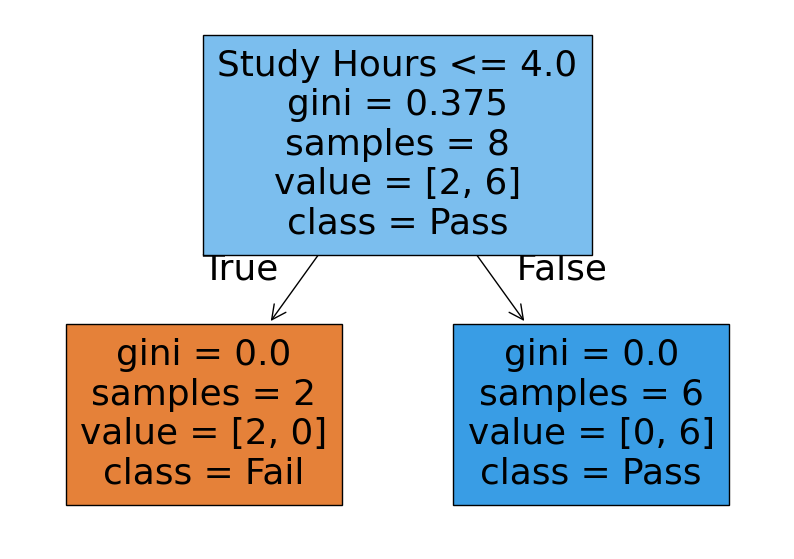

In [8]:
import numpy as np
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a dataset with 10 students
data = {
    'Study_Hours': [2, 4, 6, 8, 10, 12, 3, 5, 7, 9],
    'Previous_Exam_Score': [60, 65, 70, 80, 85, 90, 50, 75, 55, 95],
    'Pass/Fail': [0, 0, 1, 1, 1, 1, 0, 1, 0, 1]  # 1: Pass, 0: Fail
}

# Convert to DataFrame
df = pd.DataFrame(data)
print("Dataset:\n", df)

# Features: Study_Hours and Previous_Exam_Score
X = df[['Study_Hours', 'Previous_Exam_Score']]

# Labels: Pass/Fail
y = df['Pass/Fail']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree Classifier with study hours as the root node
# The parameter 'max_features=1' forces the tree to consider 'Study Hours' first
clf = DecisionTreeClassifier(random_state=42, max_depth=5, max_features=1)
clf.fit(X_train, y_train)

# Prediction on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the decision tree rules
tree_rules = export_text(clf, feature_names=['Study Hours', 'Previous Exam Scores'])
print(tree_rules)

# Visualize the Decision Tree
plt.figure(figsize=(10, 7))
plot_tree(clf, feature_names=['Study Hours', 'Previous Exam Scores'], class_names=['Fail', 'Pass'], filled=True)
plt.show()


**Problem 2.2:** Predicting whether a student will pass (1) or fail (0) based on study hours and number of previous passes. Sample dataset with two predictor variables: Study Hours, Previous Passes.

**Dataset** = 'https://github.com/amrahmani/ML/blob/main/student_data.csv'

**Objective:** Fit **a Decision Tree classifier** to the data to predict the probability of passing for a new student.

   Student ID  Assignments Completed  Attendance Rate  Previous GPA  \
0           1                     11             0.76          3.41   
1           2                      8             0.84          3.24   
2           3                     12             1.00          2.86   
3           4                      9             0.74          3.53   
4           5                     11             0.95          3.43   

   Study Hours  Previous Passes  Pass/Fail  
0            3                1          0  
1           19                5          1  
2           20                4          1  
3            1                2          0  
4           21                5          1  
Accuracy: 100.00%


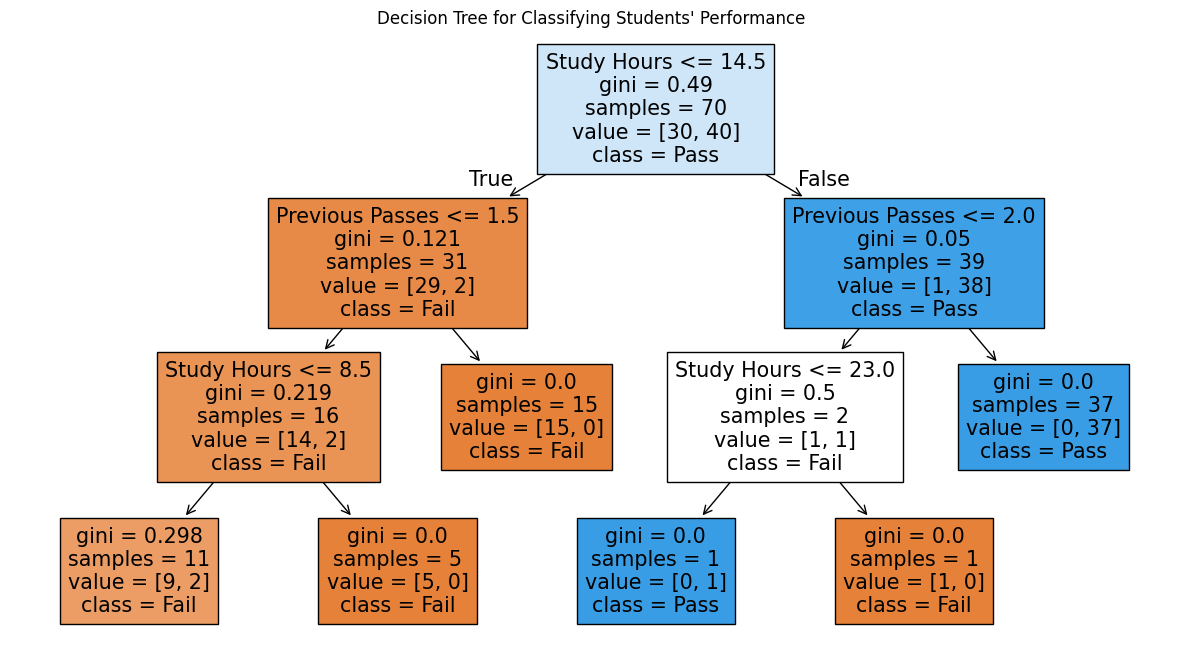

Student 1 with features [15, 2]: 1
Student 2 with features [10, 10]: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/Machine-Learning/main/student_data.csv'

# Read the CSV file into a Pandas DataFrame
# A DataFrame in Pandas is a two-dimensional, labeled data structure with columns of potentially different types.
df = pd.read_csv(url)
# Inspect the first few rows of the dataset
print(df.head())

# Define features and target
# [['Assignments Completed', 'Attendance Rate', 'Previous GPA', 'Study Hours', 'Previous Passes']]
X = df[['Study Hours', 'Previous Passes']]
y = df['Pass/Fail']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Fail', 'Pass'], filled=True)
plt.title("Decision Tree for Classifying Students' Performance")
plt.show()

# Predict the class of a new student with given features
# [['Assignments Completed', 'Attendance Rate', 'Previous GPA', 'Study Hours', 'Previous Passes']]
new_data = [[15, 2], [ 10, 10]]
predictions = clf.predict(new_data)

# Display the predictions
for i, pred in enumerate(predictions):
    print(f"Student {i+1} with features {new_data[i]}: {pred}")


Calculate and visualize **the decision boundary** for the above Problem


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


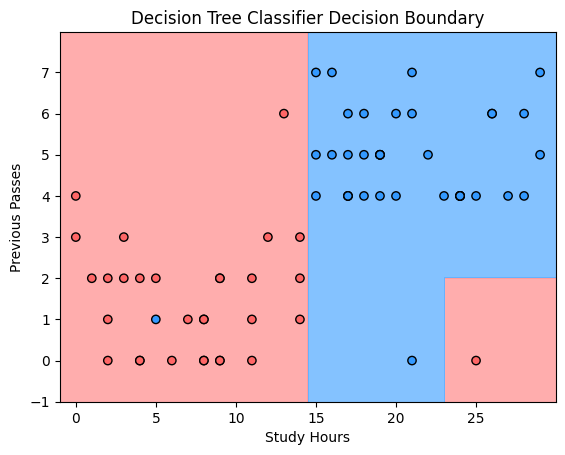

In [11]:
from matplotlib.colors import ListedColormap
# Plot decision boundary
def plot_decision_boundary(X, y, classifier, title):
    h = .02  # step size in the mesh
    # Use .iloc for DataFrame slicing
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Assuming ListedColormap is imported, if not, add:
    # from matplotlib.colors import ListedColormap
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#ff9999', '#66b3ff']))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#ff6666', '#3399ff']))
    plt.xlabel('Study Hours')
    plt.ylabel('Previous Passes')
    plt.title(title)
    plt.show()

# Plot decision boundary for the training set
plot_decision_boundary(X_train, y_train, clf, 'Decision Tree Classifier Decision Boundary')

**Practice:**  
**Hyperparameters** are parameters that are set before the learning process begins.
1. For problem 1.1, explore different QDA hyperparameters settings (e.g., priors).
2. For problem 1.1, compare QDA with other classification algorithms (e.g., LDA) to assess performance differences and to show decision boundary.
3. For problem 1.2, try these two classifiers and compare the results: GaussianNB and MultinomialNB. Justify your findings.
4. For problem 2.1, add new data to the dataset and also add noise to the dataset.
5. For problem 2.2, change max_depth to 2, 3, and 4 to see the effects.
6. For problem 2.2, replace criterion:Gini with entropy.
7. For problem 2.2, try other features such as: 'Attendance rate', 'Previous GPA'
8. For problem 2.2, explore different  hyperparameters settings (e.g., min_samples_leaf, min_samples_split).
